In [ ]:
class NeuralNetwork:
    def __init__(self, layers, optimizer='adam', loss='cross_entropy'):
        self.layers = layers
        self.optimizer = self._get_optimizer(optimizer)
        self.loss_fn = self._get_loss_function(loss)
        self.history = {'train_loss': [], 'val_loss': []}

    def train(self, X_train, y_train, X_val, y_val,
              epochs=100, batch_size=32):

        for epoch in range(epochs):
            # Training
            train_loss = 0
            for batch_X, batch_y in self.get_batches(X_train, y_train, batch_size):
                # Forward pass
                y_pred = self.forward(batch_X)
                loss = self.loss_fn(y_pred, batch_y)

                # Backward pass
                gradients = self.backward(loss)

                # Update weights
                self.optimizer.update(self.parameters, gradients)

                train_loss += loss

            # Validation
            val_pred = self.forward(X_val)
            val_loss = self.loss_fn(val_pred, y_val)

            # Logging
            self.history['train_loss'].append(train_loss / num_batches)
            self.history['val_loss'].append(val_loss)

            # Learning rate scheduling
            self.adjust_learning_rate(epoch)

            print(f'Epoch {epoch}: Train Loss = {train_loss:.4f}, '
                  f'Val Loss = {val_loss:.4f}')

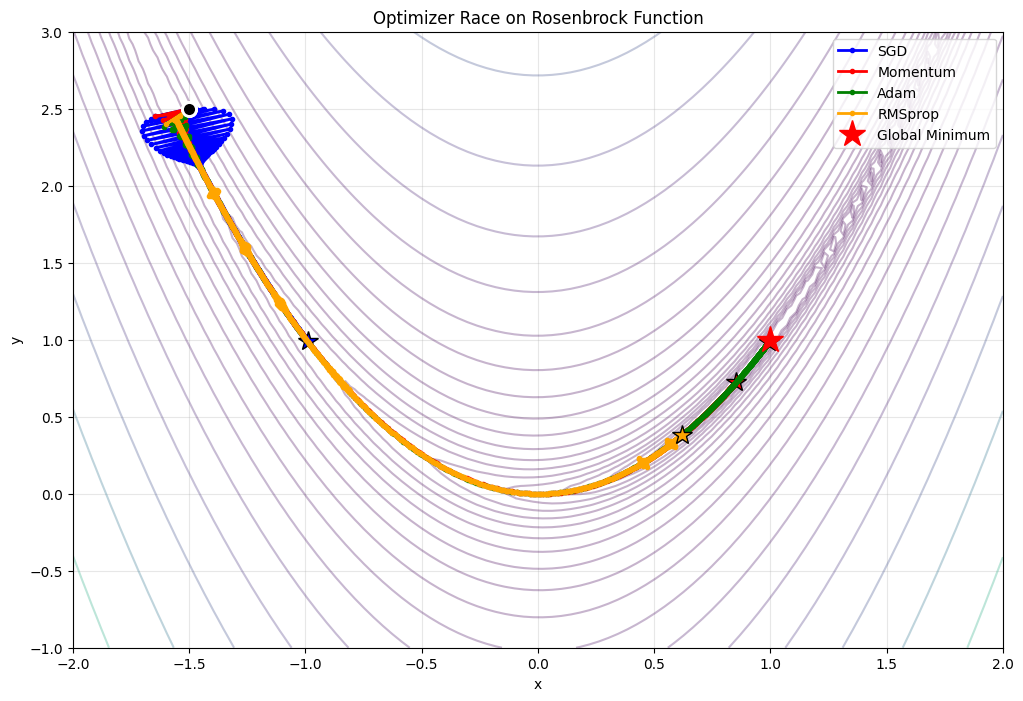


🏁 Фінальні результати:
SGD       : Loss = 3.9699, Distance to minimum = 1.9909
Momentum  : Loss = 0.0214, Distance to minimum = 0.3081
Adam      : Loss = 0.0001, Distance to minimum = 0.0161
RMSprop   : Loss = 0.1464, Distance to minimum = 0.7282


In [36]:
import torch
import matplotlib.pyplot as plt
def optimizer_race_interactive(epochs=100):
    """Інтерактивне змагання оптимізаторів"""

    # Rosenbrock function - класичний тест
    def rosenbrock(x, y):
        return (1 - x)**2 + 100 * (y - x**2)**2

    # Створюємо окремі стартові точки для кожного оптимізатора
    start_points = {
        'SGD': torch.tensor([-1.5, 2.5], requires_grad=True),
        'Momentum': torch.tensor([-1.5, 2.5], requires_grad=True),
        'Adam': torch.tensor([-1.5, 2.5], requires_grad=True),
        'RMSprop': torch.tensor([-1.5, 2.5], requires_grad=True)
    }

    optimizers = {
        'SGD': torch.optim.SGD([start_points['SGD']], lr=0.001),
        'Momentum': torch.optim.SGD([start_points['Momentum']], lr=0.001, momentum=0.8),
        'Adam': torch.optim.Adam([start_points['Adam']], lr=0.1),
        'RMSprop': torch.optim.RMSprop([start_points['RMSprop']], lr=0.01)
    }

    # Зберігаємо траєкторії
    trajectories = {name: [start_points[name].detach().numpy().copy()]
                   for name in optimizers.keys()}

    # Навчання
    for step in range(epochs):
        for name, opt in optimizers.items():
            point = start_points[name]

            # Обчислюємо loss
            loss = rosenbrock(point[0], point[1])

            # Backward pass
            opt.zero_grad()
            loss.backward()
            opt.step()

            # Зберігаємо позицію
            trajectories[name].append(point.detach().numpy().copy())

    # Візуалізація
    import numpy as np
    import matplotlib.pyplot as plt

    # Створюємо контурний графік Rosenbrock function
    x = np.linspace(-2, 2, 100)
    y = np.linspace(-1, 3, 100)
    X, Y = np.meshgrid(x, y)
    Z = (1 - X)**2 + 100 * (Y - X**2)**2

    plt.figure(figsize=(12, 8))
    plt.contour(X, Y, Z, levels=np.logspace(-0.5, 3.5, 20), alpha=0.3)

    # Малюємо траєкторії
    colors = {'SGD': 'blue', 'Momentum': 'red', 'Adam': 'green', 'RMSprop': 'orange'}

    for name, trajectory in trajectories.items():
        trajectory = np.array(trajectory)
        plt.plot(trajectory[:, 0], trajectory[:, 1],
                color=colors[name], label=name, linewidth=2, marker='o', markersize=3)
        # Початкова точка
        plt.plot(trajectory[0, 0], trajectory[0, 1],
                'ko', markersize=10, markeredgecolor='white', markeredgewidth=2)
        # Кінцева точка
        plt.plot(trajectory[-1, 0], trajectory[-1, 1],
                color=colors[name], marker='*', markersize=15, markeredgecolor='black')

    plt.plot(1, 1, 'r*', markersize=20, label='Global Minimum')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Optimizer Race on Rosenbrock Function')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

    # Виводимо фінальні результати
    print("\n🏁 Фінальні результати:")
    for name in optimizers.keys():
        final_point = trajectories[name][-1]
        final_loss = rosenbrock(final_point[0], final_point[1]).item()
        distance = np.sqrt((final_point[0] - 1)**2 + (final_point[1] - 1)**2)
        print(f"{name:10s}: Loss = {final_loss:.4f}, Distance to minimum = {distance:.4f}")

# Виклик функції
optimizer_race_interactive(800)

In [ ]:
def lr_casino_game(model, data_loader):
    """Гра: вгадай оптимальний LR з 3 спроб"""

    # Секретний оптимальний LR
    optimal_lr = random.choice([1e-4, 3e-4, 1e-3, 3e-3, 1e-2])

    print("🎰 LR КАЗИНО - У вас 3 спроби!")
    print("Підказка: почніть з 3e-4 для Adam")

    attempts = []

    for attempt in range(3):
        lr_guess = float(input(f"Спроба {attempt+1}/3. Ваш LR: "))

        # Навчаємо 5 епох
        model_copy = copy.deepcopy(model)
        optimizer = torch.optim.Adam(model_copy.parameters(), lr=lr_guess)

        final_loss = quick_train(model_copy, optimizer, data_loader, epochs=5)

        # Даємо підказку
        if lr_guess < optimal_lr / 10:
            hint = "🐌 Занадто повільно! Спробуйте більший LR"
        elif lr_guess > optimal_lr * 10:
            hint = "💥 Занадто швидко! Модель diverge"
        elif abs(lr_guess - optimal_lr) / optimal_lr < 0.5:
            hint = "🔥 Дуже близько!"
        else:
            hint = "🤔 Можна краще"

        print(f"Loss: {final_loss:.4f} - {hint}")
        attempts.append((lr_guess, final_loss))

    print(f"\n✅ Оптимальний LR був: {optimal_lr}")
    print("Ваші результати:")
    for lr, loss in attempts:
        print(f"  LR: {lr:.1e} -> Loss: {loss:.4f}")